#### 数据挖掘的五大流程：
##### 1. 获取数据
##### 2. 数据预处理
数据预处理是从数据中检测，纠正或删除损坏，不准确或不适用于模型的记录的过程可能面对的问题有：数据类型不同，比如有的是文字，有的是数字，有的含时间序列，有的连续，有的间断。也可能，数据的质量不行，有噪声，有异常，有缺失，数据出错，量纲不一，有重复，数据是偏态，数据量太大或太小数据预处理的目的：让数据适应模型，匹配模型的需求
##### 3. 特征工程
特征工程是将原始数据转换为更能代表预测模型的潜在问题的特征的过程，可以通过挑选最相关的特征，提取特征以及创造特征来实现。其中创造特征又经常以降维算法的方式实现。可能面对的问题有：特征之间有相关性，特征和标签无关，特征太多或太小，或者干脆就无法表现出应有的数据现象或无法展示数据的真实面貌特征工程的目的：1) 降低计算成本，2) 提升模型上限
##### 4. 建模
测试模型并预测出结果
##### 5. 上线
验证模型效果

#### sklearn中的数据预处理和特征工程
##### 模块preprocessing：几乎包含数据预处理的所有内容
##### 模块Impute：填补缺失值专用
##### 模块feature_selection：包含特征选择的各种方法的实践
##### 模块decomposition：包含降维算法

数据的无量纲化可以是线性的，也可以是非线性的。线性的无量纲化包括中心化处理和缩放处理。中心化的本质是让所有记录减去一个固定值，即让数据处于某一位置。缩放的本质是通过除以一个固定值，将数据固定在某个范围内，取对数也是一种缩放。

#### preprocessing.MinMaxScaler 数据归一化
重要参数 feature_range(控制我们希望数据压缩到的范围，默认是[0,1])

In [1]:
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = [[-1,2],[-0.5,6],[0,10],[1,18]]
import pandas as pd
pd.DataFrame(data)

,0,1
0,-1.0,2
1,-0.5,6
2,0.0,10
3,1.0,18


In [3]:
# 实现归一化
scaler = MinMaxScaler() #实例化
scaler = scaler.fit(data) #fit.在这里的本质是生成min和max
result = scaler.transform(data) #通过结果导出结果
result

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [4]:
result_ = scaler.fit_transform(data) #训练和导出结果一步达成
scaler.inverse_transform(result_) #将归一化后的结果逆转

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [5]:
#使用MinMaxScaler的参数feature_range实现归一化【0,1】以外的范围中
data = [[-1,2],[-0.5,6],[0,10],[1,18]]
scaler = MinMaxScaler(feature_range=[5,10]) #依然实例化
result = scaler.fit_transform(data) #fit_transform一步导出结果

In [6]:
result

array([[ 5.  ,  5.  ],
       [ 6.25,  6.25],
       [ 7.5 ,  7.5 ],
       [10.  , 10.  ]])

In [ ]:
'''
当x中的特征数量非常多的时候，fit会报错并表示，数据量太大了计算不了
此时使用partial_fit作为训练接口
scaler = scaler.partial_fit(data)
'''

#### preprocessing.StandardScaler
当数据(x)按均值(μ)中心化后，再按标准差(σ)缩放，数据就会服从为均值为0，方差为1的正态分布（即标准正态分布），而这个过程，就叫做数据标准化(Standardization)

In [7]:
from sklearn.preprocessing import StandardScaler
data = [[-1,2],[-0.5,6],[0,10],[1,18]]

scaler = StandardScaler() #实例化
scaler.fit(data) #fit 本质是生成均值和方差

print('scaler.mean:{}'.format(scaler.mean_)) #查看均值属性mean_
print('scaler.var:{}'.format(scaler.var_)) #查看方差属性var_

scaler.mean:[-0.125  9.   ]
scaler.var:[ 0.546875 35.      ]


In [8]:
x_std = scaler.transform(data) #通过接口导出结果
print('x_std.mean:{}'.format(x_std.mean())) #导出的结果是一个数组 用mean()查看均值
print('x_std.std：{}'.format(x_std.std())) #用std查看方差

x_std.mean:0.0
x_std.std：1.0


In [9]:
scaler.fit_transform(data) #用接口一步达成结果

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [10]:
scaler.inverse_transform(x_std) #使用inverse_transform逆转标准化

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

##### StandardScaler和MinMaxScaler选哪个？
看情况。大多数机器学习算法中，会选择StandardScaler来进行特征缩放，因为MinMaxScaler对异常值非常敏感。在PCA，聚类，逻辑回归，支持向量机，神经网络这些算法中，StandardScaler往往是最好的选择。
##### MinMaxScaler 
在不涉及距离度量、梯度、协方差计算以及数据需要被压缩到特定区间时使用广泛，比如数字图像处理中量化像素强度时，都会使用MinMaxScaler将数据压缩于[0,1]区间之中。
##### 建议先试试看StandardScaler，效果不好换MinMaxScaler

除了StandardScaler和MinMaxScaler之外，sklearn中也提供了各种其他缩放处理（中心化只需要一个pandas广播一下减去某个数就好了，因此sklearn不提供任何中心化功能）。比如，在希望压缩数据，却不影响数据的稀疏性时（不影响矩阵中取值为0的个数时），我们会使用MaxAbsScaler；在异常值多，噪声非常大时，我们可能会选用分位数来无量纲化，此时使用RobustScaler。

![Title](1579419014(1).jpg)

## 缺失值

In [11]:
import pandas as pd
data = pd.read_csv(r'Narrativedata.csv',index_col=0) #index_col 请把第0列当成索引
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


##### impute.SimpleImputer
classsklearn.impute.SimpleImputer(missing_values=nan, strategy=’mean’, fill_value=None, verbose=0,copy=True

In [20]:
'''四个重要参数：
missing_values:告诉SimpleImputer,数据中的缺失值长什么样，默认np.nan 
strategy:我们填补缺失值的策略，默认均值。
         mean,使用均值（仅对数值型特征可用）
         median,使用中值填补（仅对数值型特征可用）
         most_frequent,用众数填补（对数值型和字符型特征都可用）
         constant,表示请参考参数fill_value中的值（对数值型和字符型特征都可用）
fill_vale:当参数strategy为contant的时候可用，可输入字符串或数字表示要填充的值，常用0
copy:默认True，将创建特征矩阵的副本，反之则会将缺失值填补到原来的特征矩阵中去
'''

'四个重要参数：\nmissing_values:告诉SimpleImputer,数据中的缺失值长什么样，默认np.nan \nstrategy:我们填补缺失值的策略，默认均值。\n         mean,使用均值（仅对数值型特征可用）\n         median,使用中值填补（仅对数值型特征可用）\n         most_frequent,用众数填补（对数值型和字符型特征都可用）\n         constant,表示请参考参数fill_value中的值（对数值型和字符型特征都可用）\nfill_vale:当参数strategy为contant的时候可用，可输入字符串或数字表示要填充的值，常用0\ncopy:默认True，将创建特征矩阵的副本，反之则会将缺失值填补到原来的特征矩阵中去\n'

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         714 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [13]:
Age = data.loc[:,"Age"].values.reshape(-1,1)            #sklearn当中特征矩阵必须是二维
Age[:20]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [nan],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [nan],
       [31.],
       [nan]])

In [14]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer()#实例化，默认均值填补
imp_median = SimpleImputer(strategy="median")           #用中位数填补
imp_0 = SimpleImputer(strategy="constant",fill_value=0) #用0填补
imp_mean = imp_mean.fit_transform(Age)                  #fit_transform一步完成调取结果
imp_median = imp_median.fit_transform(Age)
imp_0 = imp_0.fit_transform(Age)
print(imp_mean[:20])
print(imp_median[:20])
print(imp_0[:20])

[[22.        ]
 [38.        ]
 [26.        ]
 [35.        ]
 [35.        ]
 [29.69911765]
 [54.        ]
 [ 2.        ]
 [27.        ]
 [14.        ]
 [ 4.        ]
 [58.        ]
 [20.        ]
 [39.        ]
 [14.        ]
 [55.        ]
 [ 2.        ]
 [29.69911765]
 [31.        ]
 [29.69911765]]
[[22.]
 [38.]
 [26.]
 [35.]
 [35.]
 [28.]
 [54.]
 [ 2.]
 [27.]
 [14.]
 [ 4.]
 [58.]
 [20.]
 [39.]
 [14.]
 [55.]
 [ 2.]
 [28.]
 [31.]
 [28.]]
[[22.]
 [38.]
 [26.]
 [35.]
 [35.]
 [ 0.]
 [54.]
 [ 2.]
 [27.]
 [14.]
 [ 4.]
 [58.]
 [20.]
 [39.]
 [14.]
 [55.]
 [ 2.]
 [ 0.]
 [31.]
 [ 0.]]


In [15]:
#在这里我们使用中位数填补Age
data.loc[:,"Age"] = imp_median

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [16]:
#使用众数填补Embarked
Embarked = data.loc[:,"Embarked"].values.reshape(-1,1)

imp_mode = SimpleImputer(strategy='most_frequent')
data.loc[:,'Embarked'] = imp_mode.fit_transform(Embarked)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    891 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


#### 处理分类型数据：编码和哑变量

##### preprocessing.LabelEncoder 标签专用，能够将分类转换为分类数值

In [17]:
from sklearn.preprocessing import LabelEncoder

y = data.iloc[:,-1] #要输入的是标签，不是特征矩阵，所以允许一维

le = LabelEncoder() #实例化
le = le.fit(y) #导入数据
label = le.transform(y) # transform接口调取结果

print("label:{}".format(label)) #查看获取的结果label
print("le.classes_:{}".format(le.classes_)) #属性classes_查看标签中究竟有多少类别

label:[0 2 2 2 0 0 0 0 2 2 1 2 0 0 0 1 0 2 0 2 1 2 2 2 0 1 0 0 2 0 0 2 2 0 0 0 2
 0 0 2 0 0 0 1 2 0 0 2 0 0 0 0 2 2 0 2 2 0 2 0 0 2 0 0 0 2 2 0 2 0 0 0 0 0
 2 1 0 1 2 2 0 2 2 0 2 2 0 0 2 0 0 0 0 0 0 0 1 2 2 0 0 0 0 0 0 0 2 2 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 0 1 0 0 2 0 0 2 0 0 0 1 1 2 0 0 0 2 0
 0 1 0 1 1 0 0 0 2 0 0 0 0 2 0 0 0 2 2 0 0 0 1 0 2 0 0 0 1 0 0 0 0 0 0 1 2
 0 2 2 0 0 2 0 2 1 2 2 0 0 1 0 0 0 0 0 2 0 0 2 2 2 1 2 1 0 0 2 2 0 2 0 2 0
 0 0 2 0 2 0 0 0 2 1 0 2 0 0 0 2 0 0 0 2 0 0 0 0 0 2 2 0 0 0 0 1 0 2 2 2 2
 2 0 2 0 1 0 0 1 2 2 1 0 2 2 0 2 2 0 0 1 1 0 0 0 2 0 0 2 0 2 2 2 2 0 0 0 0
 0 0 2 2 2 2 1 2 0 2 2 2 0 2 2 2 0 0 0 2 2 1 2 2 0 1 2 2 0 2 0 1 2 2 2 0 1
 0 2 0 0 2 1 0 2 2 0 0 0 2 2 2 2 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0 2 2 2 1
 2 0 0 0 0 2 2 0 0 0 2 2 0 2 0 0 0 2 0 2 2 2 0 2 2 0 0 0 0 2 2 1 0 0 0 1 0
 2 0 0 0 0 2 0 2 0 1 2 0 0 0 0 0 0 0 0 2 2 0 2 2 2 2 0 0 2 0 2 0 0 2 0 0 2
 2 2 2 2 2 2 0 0 0 2 1 2 0 2 2 0 2 1 0 0 0 0 0 0 0 1 1 0 2 2 0 0 1 0 0 2 0
 0 0 2 2 1 2 0 0 1 

In [18]:
le.fit_transform(y) #使用fit_transform一步到位

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1,
       0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2,

In [29]:
le.inverse_transform(label) #使用inverse_transform可以逆转

array(['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Unknown', 'Yes', 'No', 'No', 'No', 'Unknown', 'No', 'Yes', 'No',
       'Yes', 'Unknown', 'Yes', 'Yes', 'Yes', 'No', 'Unknown', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Unknown', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Unknown', 'No',
       'Unknown', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Unknown', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'Unknown', 'No', 'No', 'Yes', 'No', 'N

In [19]:
data.iloc[:,-1] = label #让标签等于我们运行出来的结果
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [20]:
from sklearn.preprocessing import LabelEncoder
data.iloc[:,-1] = LabelEncoder().fit_transform(data.iloc[:,-1])

##### preprocessing.OrdinalEncoder：特征专用，能够将分类特征转换为分类数值

In [21]:
from sklearn.preprocessing import OrdinalEncoder
#接口categories_对应LabelEncoder的接口classes_，一模一样的功能

data_ = data.copy()
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [22]:
OrdinalEncoder().fit(data_.iloc[:,1:-1]).categories_ # [:,1:-1]所有行  第一列到最后一列 .categories_类别

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [23]:
data_.iloc[:,1:-1] = OrdinalEncoder().fit_transform(data_.iloc[:,1:-1])

In [24]:
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,0
1,38.0,0.0,0.0,2
2,26.0,0.0,2.0,2
3,35.0,0.0,2.0,2
4,35.0,1.0,2.0,0


##### preprocessing.OneHotEncoder：独热编码，创建哑变量
我们刚才已经用OrdinalEncoder把分类变量Sex和Embarked都转换成数字对应的类别了。在舱门Embarked这一列中，我们使用[0,1,2]代表了三个不同的舱门，然而这种转换是正确的吗？我们来思考三种不同性质的分类数据：1）舱门（S，C，Q）三种取值S，C，Q是相互独立的，彼此之间完全没有联系，表达的是S≠C≠Q的概念。这是名义变量。2）学历（小学，初中，高中）三种取值不是完全独立的，我们可以明显看出，在性质上可以有高中>初中>小学这样的联系，学历有高低，但是学历取值之间却不是可以计算的，我们不能说小学 + 某个取值 = 初中。这是有序变量。3）体重（>45kg，>90kg，>135kg）各个取值之间有联系，且是可以互相计算的，比如120kg - 45kg = 90kg，分类之间可以通过数学计算互相转换。这是有距变量。然而在对特征进行编码的时候，这三种分类数据都会被我们转换为[0,1,2]，这三个数字在算法看来，是连续且可以计算的，这三个数字相互不等，有大小，并且有着可以相加相乘的联系。所以算法会把舱门，学历这样的分类特征，都误会成是体重这样的分类特征。这是说，我们把分类转换成数字的时候，忽略了数字中自带的数学性质，所以给算法传达了一些不准确的信息，而这会影响我们的建模.

In [27]:
from sklearn.preprocessing import OneHotEncoder
X = data.iloc[:,1:-1] #所有的行和第一列到最后一列

enc = OneHotEncoder(categories='auto').fit(X) #自动模式
result = enc.transform(X).toarray() #transform是一个稀疏矩阵，转化为array格式
print(result)

[[0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0.]
 [0. 1. 0. 1. 0.]]


In [28]:
# 依然可以直接一步到位，但为了给大家展示模型属性，所以还是写成了三步
OneHotEncoder(categories='auto').fit_transform(X).toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [29]:
# 依然可以还原
pd.DataFrame(enc.inverse_transform(result))

,0,1
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
5,male,Q
6,male,S
7,male,S
8,female,S
9,female,C


In [30]:
enc.get_feature_names()  #查看所有的属性名字

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

In [31]:
result

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [32]:
#axis=1,表示跨行进行合并，也就是将量表左右相连，如果是axis=0，就是将量表上下相连
newdata = pd.concat([data,pd.DataFrame(result)],axis = 1)
newdata.head()

,Age,Sex,Embarked,Survived,0,1,2,3,4
0,22.0,male,S,0,0.0,1.0,0.0,0.0,1.0
1,38.0,female,C,2,1.0,0.0,1.0,0.0,0.0
2,26.0,female,S,2,1.0,0.0,0.0,0.0,1.0
3,35.0,female,S,2,1.0,0.0,0.0,0.0,1.0
4,35.0,male,S,0,0.0,1.0,0.0,0.0,1.0


In [33]:
newdata.drop(['Sex','Embarked'],axis=1,inplace = True) #将Sex和Embarked整列删除
newdata.columns = ['Age','Survived','Female','Male','Embarked_C','Embarked_Q','Embarked_S'] #跟换列名
newdata.head()

,Age,Survived,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0,0.0,1.0,0.0,0.0,1.0
1,38.0,2,1.0,0.0,1.0,0.0,0.0
2,26.0,2,1.0,0.0,0.0,0.0,1.0
3,35.0,2,1.0,0.0,0.0,0.0,1.0
4,35.0,0,0.0,1.0,0.0,0.0,1.0


### 处理连续型特征，二值化与分段
##### sklearn.preprocessing.Binarizer
根据阈值将数据二值化（将特征值设置为0或1），用于处理连续型变量。大于阈值的值映射为1，而小于或等于阈值的值映射
为0。二值化是对文本计数数据的常见操作，分析人员可以决定仅考虑某种现象的存在与否。它还可以用作考虑布尔随机变量
的估计器的预处理步骤（例如，使用贝叶斯设置中的伯努利分布建模）。

In [34]:
# 将年龄二值化
data_2 = data.copy()
from sklearn.preprocessing import Binarizer
X = data_2.iloc[:,0].values.reshape(-1,1)  #类为特征专用，所以不能使用一维数组
transformer = Binarizer(threshold=30).fit_transform(X) #大于30的1 小于等于30的为0
transformer

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

##### preprocessing.KBinsDiscretizer
这是将连续型变量划分为分类变量的类，能够将连续型变量排序后按顺序分箱后编码。总共包含三个重要参数
###### n_bins 每个特征中分箱的个数，默认5，一次会被运用到所有导入的特征
###### encode 编码的方式，默认onehot
"onehot"：做哑变量，之后返回一个稀疏矩阵，每一列是一个特征中的一个类别，含有该类别的样本表示为1，不含的表示为0 “ordinal”：每个特征的每个箱都被编码为一个整数，返回每一列是一个特征，每个特征下含有不同整数编码的箱的矩阵"onehot-dense"：做哑变量，之后返回一个密集数组。
###### strategy 用来定义箱宽的方式，默认‘quantile’
'uniform':表示等宽分箱，即每个特征中的每个箱的最大值之间的差为(特征.max() - 特征.min())/(n_bins) 
"quantile"：表示等位分箱，即每个特征中的每个箱内的样本数量都相同"kmeans"：表示按聚类分箱，每个箱中的值到最近的一维k均值聚类的簇心得距离都相同

In [39]:
from sklearn.preprocessing import KBinsDiscretizer

x = data.iloc[:,0].values.reshape(-1,1)
est = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform')  #等宽分箱
est.fit_transform(x)

#查看转换后分的箱：变成了一列中的三箱
print(set(est.fit_transform(X).ravel()))

est = KBinsDiscretizer(n_bins=3, encode='onehot', strategy='uniform')
#查看转换后分的箱：变成了哑变量
print(est.fit_transform(X).toarray())

{0.0, 1.0, 2.0}
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


##### 我们有四种方法可以用来选择特征：过滤法，嵌入法，包装法，和降维算法。

In [40]:
# 导入数据，使用数据识别数据

import pandas as pd
data = pd.read_csv(r'digit recognizor.csv')

X = data.iloc[:,1:] #选定所有行，第二列开始到结束
y = data.iloc[:,0] #选定所有行，第一列

X.shape

(42000, 784)

###### Filter过滤法
过滤方法通常用作预处理步骤，特征选择完全独立于任何机器学习算法。它是根据各种统计检验中的分数以及相关性的各项指标来选择特征。

##### 方差过滤
###### VarianceThreshold
这是通过特征本身的方差来筛选特征的类。比如一个特征本身的方差很小，就表示样本在这个特征上基本没有差异，可能特征中的大多数值都一样，甚至整个特征的取值都相同，那这个特征对于样本区分没有什么作用。所以无论接下来的特征工程要做什么，都要优先消除方差为0的特征。VarianceThreshold有重要参数threshold，表示方差的阈值，表示舍弃所有方差小于threshold的特征，不填默认为0，即删除所有的记录都相同的特征。

In [41]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold() #实例化，不填参数默认方差为0
X_var0 = selector.fit_transform(X) #获取删除不合格特征之后的新特征矩阵

#也可以直接写成X=VarianceThreshold().fit_transform(X)
X_var0.shape
'''可以看到我们已经删除了方差为0的特征（特征中所有的数都一样），但还剩708个特征，明显需要进一步的特征选择。'''

(42000, 708)

In [43]:
'''比如说，我们希望留下一半的特征，那可以设定一个让特征总数减半的方差阈值，只要找到特征方差的中位数，
再将这个中位数作为参数threshold的值输入就好了'''

import numpy as np
X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)
print('X_var:{}'.format(X.var().values))
print('median_X_var:{}'.format(np.median(X.var().values)))
print('X_fsvar.shape:{}'.format(X_fsvar.shape))

X_var:[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.22760590e-01 2.64689018e+00 1.11085714e+00 1.92857143e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.09523810e-03 5.41186213e-02 1.28065733e+00 5.33793150e+00
 9.74592647e+00 1.06219147e+01 2.49289953e+01 3.37671294e+01
 3.59425660e+01 3.49309575e+01 3.62943342e+01 3.27911079e+01
 3.04237672e+01 2.95547817e+01 2.00568398e+01 1.19545659e+01
 8.60419724e+00 2.55465685e+00 1.60530842e+00 9.29377602e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.75238095e-02 2.00238095e-02
 8.38442376e-01 6.23481035e-01 9.48446647e+00 2.93530906e+01
 5.67872968e+01 1.

In [61]:
# KNN vs 随机森林在不同方差过滤效果下的对比
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
import numpy as np

x = data.iloc[:,1:] # 选定所有行，第二列开始到结束
y = data.iloc[:,0] # 选定所有行，第一列

x_fsvar = VarianceThreshold(np.median(x.var().values)).fit_transform(x)

In [48]:
'''KNN方差过滤前'''
print('cross_val_score:{}'.format(cross_val_score(KNN(),x,y,cv=5).mean()))
#python中的魔法命令，可以直接使用%%timeit来计算运行这个cell中的代码所需的时间
#为了计算所需的时间，需要将这个cell中的代码运行很多次（通常是7次）后求平均值，因此运行%%timeit的时间会远远
#超过cell中的代码单独运行的时间

'''%%timeit
cross_val_score(KNN(),X,y,cv=5).mean()'''

cross_val_score:0.9658569700264943


'%%timeit\ncross_val_score(KNN(),X,y,cv=5).mean()'

In [ ]:
'''KNN方差过滤后'''
print('cross_val_score:{}'.format(cross_val_score(KNN(),x_fsvar,y,cv=5).mean()))
'''%%timeit
cross_val_score(KNN(),x_fsvar,y,cv=5).mean()'''

In [54]:
%%timeit
'''随机森林方差过滤前'''
cross_val_score(RFC(n_estimators=10,random_state=0),x,y,cv=5).mean()

13.2 s ± 192 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


###### 过滤法的主要对象是：需要遍历特征或升维的算法们（KNN,单只决策树，SVM，神经网络，回归算法），而过滤法的主要目的是：在维持算法表现的前提下，帮助算法们降低计算成本。

![Title](1579511089(1).jpg)

##### 相关性过滤
方差挑选完毕之后，我们就要考虑下一个问题：相关性了。我们希望选出与标签相关且有意义的特征，因为这样的特征能够为我们提供大量信息。如果特征与标签无关，那只会白白浪费我们的计算内存，可能还会给模型带来噪音。在sklearn当中，我们有三种常用的方法来评判特征与标签之间的相关性：卡方，F检验，互信息。

###### 卡方检验（非负数）本质是推测两组数据之间的差异
卡方过滤是专门针对离散型标签（即分类问题）的相关性过滤。卡方检验类feature_selection.chi2计算每个非负特征和标签之间的卡方统计量，并依照卡方统计量由高到低为特征排名。再结合feature_selection.SelectKBest这个可以输入”评分标准“来选出前K个分数最高的特征的类，我们可以借此除去最可能独立于标签，与我们分类目的无关的特征。

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest  #选分数最高k个特征的类
from sklearn.feature_selection import chi2

#假设在这里我一直我需要300个特征
X_fschi = SelectKBest(chi2,k=300).fit_transform(X_fsvar,y)
X_fschi.shape

In [58]:
cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()
'''可以看出，模型的效果降低了，这说明我们在设定k=300的时候删除了与模型相关且有效的特征，我们的k值要么设置的太小
，要么我们需要调整k值，要么我们放弃相关性过滤。当然，如果模型的表现提升，则说明我们的相关性过滤是有效的，是过滤掉
模型的噪声的，这时候我们就保留相关性过滤的结果'''

0.9333098667649198

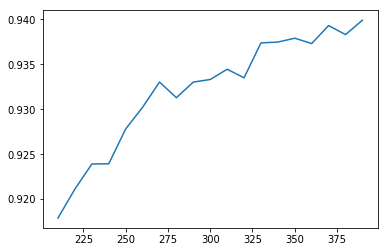

In [65]:
#选取超参数k
import matplotlib.pyplot as plt
score = []
for i in range(390,200,-10):
    X_fschi = SelectKBest(chi2, k=i).fit_transform(X_fsvar, y)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()
    score.append(once)
plt.plot(range(390,200,-10),score)
plt.show()

![Title](1579516671(1).jpg)

In [66]:
chivalue,pvalues_chi = chi2(x_fsvar,y) #卡方值和p值
chivalue #卡方值

array([ 945664.84392643, 1244766.05139164, 1554872.30384525,
       1834161.78305343, 1903618.94085294, 1845226.62427198,
       1602117.23307537,  708535.17489837,  974050.20513718,
       1188092.19961931, 1319151.43467036, 1397847.8836796 ,
       1433554.26798015, 1429043.15373433, 1332663.17213405,
       1101423.25372261,  809989.56940485,  519266.71772284,
        285681.88297156,  191589.23696468,  902883.1255264 ,
       1237265.16042373, 1503477.73699155, 1625807.41495542,
       1630206.90922916, 1630597.02883804, 1633456.72909664,
       1610816.75571229, 1483382.49543886, 1256290.1574794 ,
        951236.1617682 ,  693192.66191748,  532386.96220361,
        504617.38933715,  575090.36046243,  501025.03733245,
        802341.10683194, 1078344.8724406 , 1226540.98318702,
       1269945.07968831, 1221758.57688808, 1146535.17810241,
       1080657.20185303, 1079065.30979135, 1092222.70610032,
       1064908.45385716, 1023327.00231067,  974163.15420165,
        918857.12860617,

In [70]:
pvalues_chi #p值为0 <0.05二者相关
'''从特征工程的角度，我们希望选取卡方值很大，p值小于0.05的特征，即和标签是相关联的特征。而调用SelectKBest之
前，我们可以直接从chi2实例化后的模型中获得各个特征所对应的卡方值和P值。'''
'''可以观察到，所有特征的p值都是0，这说明对于digit recognizor这个数据集来说，方差验证已经把所有和标签无关的
特征都剔除了，或者这个数据集本身就不含与标签无关的特征。在这种情况下，舍弃任何一个特征，都会舍弃对模型有用的
信息，而使模型表现下降，因此在我们对计算速度感到满意时，我们不需要使用相关性过滤来过滤我们的数据。如果我们认
为运算速度太缓慢，那我们可以酌情删除一些特征，但前提是，我们必须牺牲模型的表现。接下来，我们试试看用其他的相
关性过滤方法验证一下我们在这个数据集上的结论。'''

'可以观察到，所有特征的p值都是0，这说明对于digit recognizor这个数据集来说，方差验证已经把所有和标签无关的\n特征都剔除了，或者这个数据集本身就不含与标签无关的特征。在这种情况下，舍弃任何一个特征，都会舍弃对模型有用的\n信息，而使模型表现下降，因此在我们对计算速度感到满意时，我们不需要使用相关性过滤来过滤我们的数据。如果我们认\n为运算速度太缓慢，那我们可以酌情删除一些特征，但前提是，我们必须牺牲模型的表现。接下来，我们试试看用其他的相\n关性过滤方法验证一下我们在这个数据集上的结论。'

###### F检验
F检验，又称ANOVA，方差齐性检验，是用来捕捉每个特征与标签之间的线性关系的过滤方法。它即可以做回归也可以做分类，因此包含feature_selection.f_classif（F检验分类）和feature_selection.f_regression（F检验回归）两个类。其中F检验分类用于标签是离散型变量的数据，而F检验回归用于标签是连续型变量的数据。

F检验的本质是寻找两组数据之间的线性关系，其原假设是”数据不存在显著的线性关系“。它返回F值和p值两个统计量。和卡方过滤一样，我们希望选取p值小于0.05或0.01的特征，这些特征与标签时显著线性相关的，而p值大于0.05或0.01的特征则被我们认为是和标签没有显著线性关系的特征，应该被删除。

In [71]:
from sklearn.feature_selection import f_classif

F,pvalue_f = f_classif(X_fsvar,y)
F

array([ 618.65383492,  846.18897012, 1115.40617051, 1362.3677305 ,
       1452.03355369, 1381.09095571, 1138.26505266,  464.29616121,
        660.00977785,  849.66393412, 1004.7450309 , 1124.76177588,
       1200.99190762, 1209.29489877, 1110.4944286 ,  854.66183292,
        577.52063451,  342.09729054,  178.67397866,  118.01145533,
        612.12261014,  899.40904291, 1196.17528948, 1424.49864852,
       1569.26556677, 1742.49910702, 1910.98023795, 1969.20520223,
       1731.37475948, 1295.09668012,  839.15325001,  531.97951763,
        371.82392681,  336.00820537,  378.93378743,  317.47025479,
        528.94881012,  766.40792176,  947.63168717, 1086.0472161 ,
       1177.72017709, 1253.79641973, 1344.06961068, 1507.33781169,
       1616.50454434, 1512.25864876, 1289.65180587, 1051.26276412,
        839.48869386,  680.07426932,  600.85538567,  633.55772663,
        683.96908509,  347.65867784,  452.76238211,  509.16387684,
        515.7498157 ,  532.86107778,  594.62512658,  664.18740

In [72]:
pvalue_f #p值

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.71193533e-220,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [74]:
k = F.shape[0] - (pvalue_f > 0.05).sum()
#X_fsF = SelectKBest(f_classif, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fsF,y,cv=5).mean()
'''得到的结论和我们用卡方过滤得到的结论一样，没有任何特征的p值大于0.01，所有的特征都是和标签相关的，因此我们不
需要相关性过滤'''

###### 互信息法
互信息法是用来捕捉每个特征与标签之间的任意关系（包括线性和非线性关系）的过滤方法。和F检验相似，它既可以做回归也可以做分类，并且包含两个类feature_selection.mutual_info_classif（互信息分类）和feature_selection.mutual_info_regression（互信息回归）。这两个类的用法和参数都和F检验一模一样，不过互信息法比F检验更加强大，F检验只能够找出线性关系，而互信息法可以找出任意关系。

互信息法不返回p值或F值类似的统计量，它返回“每个特征与目标之间的互信息量的估计”，这个估计量在[0,1]之间取值，为0则表示两个变量独立，为1则表示两个变量完全相关。

In [76]:
from sklearn.feature_selection import mutual_info_classif as MIC

result = MIC(X_fsvar,y)
k = result.shape[0] - sum(result <= 0)

#X_fsmic = SelectKBest(MIC, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fsmic,y,cv=5).mean()Tsai Ts
'''所有特征的互信息量估计都大于0，因此所有特征都与标签相关'''

array([0.06681521, 0.08291998, 0.10203694, 0.10784021, 0.11895237,
       0.10547898, 0.07890212, 0.06023902, 0.0766079 , 0.10380274,
       0.11743519, 0.14033474, 0.16212552, 0.1662196 , 0.15483579,
       0.12349968, 0.09344723, 0.06428739, 0.03491352, 0.02311557,
       0.07129902, 0.09810594, 0.12301126, 0.15487827, 0.17589627,
       0.20106568, 0.2263199 , 0.23368167, 0.21298679, 0.17643577,
       0.13655157, 0.10539107, 0.07789478, 0.0574883 , 0.04300093,
       0.03747105, 0.05626434, 0.07527011, 0.1070962 , 0.12366859,
       0.13530655, 0.15061015, 0.16192886, 0.18534429, 0.1855935 ,
       0.17278143, 0.1599068 , 0.12789034, 0.11402559, 0.09368799,
       0.08133324, 0.06940836, 0.06585639, 0.04899127, 0.05400329,
       0.07552079, 0.08430276, 0.09597843, 0.1089208 , 0.10893958,
       0.11251933, 0.10984294, 0.12330751, 0.11672659, 0.1055326 ,
       0.11373392, 0.11494545, 0.10270779, 0.08612445, 0.07452045,
       0.06678861, 0.04141912, 0.04887087, 0.0686945 , 0.07352

![Title](1579531077(1).jpg)

### Embedded嵌入法
嵌入法是一种让算法自己决定使用哪些特征的方法，即特征选择和算法训练同时进行。在使用嵌入法时，我们先使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据权值系数从大到小选择特征。这些权值系数往往代表了特征对于模型的某种贡献或某种重要性，比如决策树和树的集成模型中的feature_importances_属性，可以列出各个特征对树的建立的贡献，我们就可以基于这种贡献的评估，找出对模型建立最有用的特征。因此相比于过滤法，嵌入法的结果会更加精确到模型的效用本身，对于提高模型效力有更好的效果。并且，由于考虑特征对模型的贡献，因此无关的特征（需要相关性过滤的特征）和无区分度的特征（需要方差过滤的特征）都会因为缺乏对模型的贡献而被删除掉，可谓是过滤法的进化版。

##### feature_selection.SelectFromModel
classsklearn.feature_selection.SelectFromModel(estimator, threshold=None, prefit=False, norm_order=1,max_features=None)

SelectFromModel是一个元变换器，可以与任何在拟合后具有coef_，feature_importances_属性或参数中可选惩罚项的评估器一起使用（比如随机森林和树模型就具有属性feature_importances_，逻辑回归就带有l1和l2惩罚项，线性支持向量机也支持l2惩罚项）

对于有feature_importances_的模型来说，若重要性低于提供的阈值参数，则认为这些特征不重要并被移除。feature_importances_的取值范围是[0,1]，如果设置阈值很小，比如0.001，就可以删除那些对标签预测完全没贡献的特征。如果设置得很接近1，可能只有一两个特征能够被留下。

In [79]:
'''重要参数:
estimator:使用的模型评估器，只要是带feature_importances_或者coef_属性，或带有l1和l2惩罚项的模型都可以使用
threshold:特征重要性的阈值，重要性低于这个阈值的特征都将被删除
prefit：默认False，判断是否将实例化后的模型直接传递给构造函数。如果True，则必须直接调用fit和transform，不能使用
        fit_transform,并且SelectFromModel不能与cross_val_score,GridSearchCV和克隆估计器的类似实用程序一起使用。
norm_order:k可输入非零整数，正无穷，负无穷，默认值为1 在评估器的coef_属性高于一维的情况下，用于过滤低于阈值的系
            数的向量的范数的阶数
max_features:在阈值设定下，要选择的最大特征数。要禁用阈值并仅根据max_features选择，请设置threshold = -np.inf'''

'重要参数:\nestimator:使用的模型评估器，只要是带feature_importances_或者coef_属性，或带有l1和l2惩罚项的模型都可以使用\nthreshold:特征重要性的阈值，重要性低于这个阈值的特征都将被删除\nprefit：默认False，判断是否将实例化后的模型直接传递给构造函数。如果True，则必须直接调用fit和transform，不能使用\n        fit_transform,并且SelectFromModel不能与cross_val_score,GridSearchCV和克隆估计器的类似实用程序一起使用。\nnorm_order:k可输入非零整数，正无穷，负无穷，默认值为1 在评估器的coef_属性高于一维的情况下，用于过滤低于阈值的系\n            数的向量的范数的阶数\nmax_features:在阈值设定下，要选择的最大特征数。要禁用阈值并仅根据max_features选择，请设置threshold = -np.inf'

In [85]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

RFC_ = RFC(n_estimators = 10,random_state=0)
    
X_embedded = SelectFromModel(RFC_,threshold=0.005).fit_transform(X,y)
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为
#平均每个特征只能够分到大约0.001的feature_importances_
X_embedded.shape #模型的维度明显被降低了

(42000, 47)

feature importance:[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.96726660e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.39623410e-06
 7.35101726e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.70425050e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.09114204e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.04375545e-05
 0.00

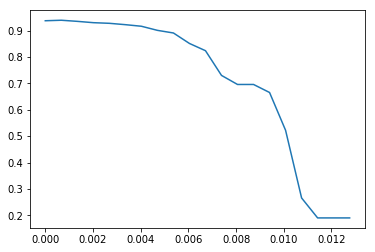

In [90]:
#同样的，我们也可以画学习曲线来找最佳阈值
import numpy as np
import matplotlib.pyplot as plt

print('feature importance:{}'.format(RFC_.fit(X,y).feature_importances_))

threshold = np.linspace(0,(RFC_.fit(X,y).feature_importances_).max(),20)

score = []
for i in threshold:
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X,y)
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [94]:
'''从图像上来看，随着阈值越来越高，模型的效果逐渐变差，被删除的特征越来越多，信息损失也逐渐变大。
但是在0.00134之前，模型的效果都可以维持在0.93以上，因此我们可以从中挑选一个数值来验证一下模型的效果。'''

X_embedded = SelectFromModel(RFC_,threshold=0.00067).fit_transform(X,y) #去除部分特征的数据
print('X_embedded.shape:{}'.format(X_embedded.shape))
print('cross_val_score:{}'.format(cross_val_score(RFC_,X_embedded,y,cv=5).mean()))
'''以看出，特征个数瞬间缩小到324多，这比我们在方差过滤的时候选择中位数过滤出来的结果392列要小，
并且交叉验证分数0.9399高于方差过滤后的结果0.9388'''

X_embedded.shape:(42000, 324)
cross_val_score:0.939905083368037


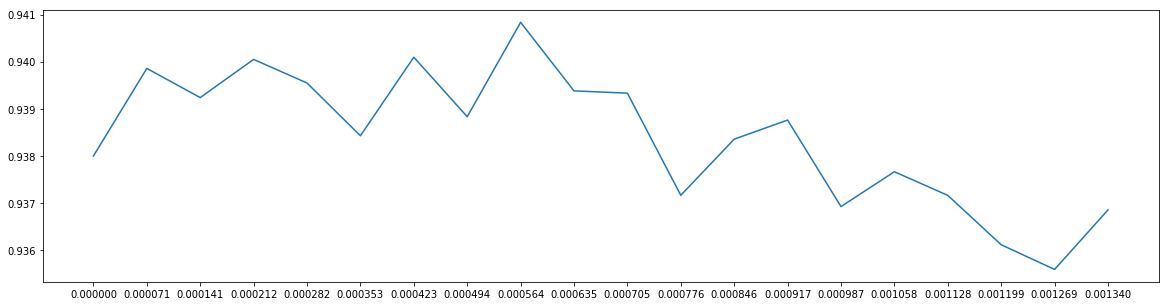

In [95]:
# 使用细化的学习曲线来找到最佳值
score2 = []
for i in np.linspace(0,0.00134,20):
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X,y)
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score2.append(once)
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0,0.00134,20),score2)
plt.xticks(np.linspace(0,0.00134,20)) #横坐标
plt.show()
'''查看结果，0.00067并不是最高点，真正的最高点0.00564已经将模型效果提升到94%以上，下面用0.000546来跑一下
SelectFromMOdel'''

In [96]:
X_embedded = SelectFromModel(RFC_,threshold=0.000564).fit_transform(X,y) #删除过相关性低的特征后
print('X_embedded.shape:{}'.format(X_embedded.shape))
print('cross_val_score:{}'.format(cross_val_score(RFC_,X_embedded,y,cv=5).mean()))

X_embedded.shape:(42000, 340)
cross_val_score:0.9408335415056387


###  Wrapper包装法
包装法也是一个特征选择和算法训练同时进行的方法，与嵌入法十分相似，它也是依赖于算法自身的选择，比如coef_属性或feature_importances_属性来完成特征选择。但不同的是，我们往往使用一个目标函数作为黑盒来帮助我们选取特征，而不是自己输入某个评估指标或统计量的阈值。包装法在初始特征集上训练评估器，并且通过coef_属性或通过feature_importances_属性获得每个特征的重要性。然后，从当前的一组特征中修剪最不重要的特征。在修剪的集合上递归地重复该过程，直到最终到达所需数量的要选择的特征。区别于过滤法和嵌入法的一次训练解决所有问题，包装法要使用特征子集进行多次训练，因此它所需要的计算成本是最高的。

###### feature_selection.RFE
classsklearn.feature_selection.RFE(estimator, n_features_to_select=None, step=1, verbose=0)

参数estimator是需要填写的实例化后的评估器，n_features_to_select是想要选择的特征个数，step表示每次迭代中希望移除的特征个数。除此之外，RFE类有两个很重要的属性，.support_：返回所有的特征的是否最后被选中的布尔矩阵，以及.ranking_返回特征的按数次迭代中综合重要性的排名。类feature_selection.RFECV会在交叉验证循环中执行RFE以找到最佳数量的特征，增加参数cv，其他用法都和RFE一模一样。

In [97]:
from sklearn.feature_selection import RFE
RFC_ = RFC(n_estimators=10,random_state=0)
selector = RFE(RFC_,n_features_to_select=340,step=50).fit(X,y)
print(selector.support_.sum())

340


In [98]:
print('selector.ranking:{}'.format(selector.ranking_))

selector.ranking:[10  9  8  7  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  7  7  6  6  5  6  5  6  6  6  6  6  6  6  6  6  6  7
  6  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  6  6  5  4  4  5  3  4
  4  4  5  4  5  7  6  7  7  7  8  8  8  8  8  8  8  8  6  7  4  3  1  2
  3  3  1  1  1  1  1  3  3  4  5  5  5  8  8  9  9  9  9  8  9  9  4  4
  3  2  1  1  1  1  1  1  1  1  1  1  2  3  3  4  5  5  9  9 10 10 10 10
  7  4  4  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  3  3  5  8 10
 10 10 10  9  4  4  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  3  4 10 10 10 10  9  7  4  3  2  2  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  2  4  4 10  9 10  6  6  4  2  3  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  3  5  9 10  8  7  4  5  3  2  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  2  1  2  4 10 10 10  9  7  5  3  3  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  3  3  5  5  9  9  9  7  5
  5  3  2  1  1  1  1  1  1  1  1 

In [99]:
X_wrapper = selector.transform(X) #更新后的特征矩阵
cross_val_score(RFC_,X_wrapper,y,cv=5).mean()

0.9389522459432109

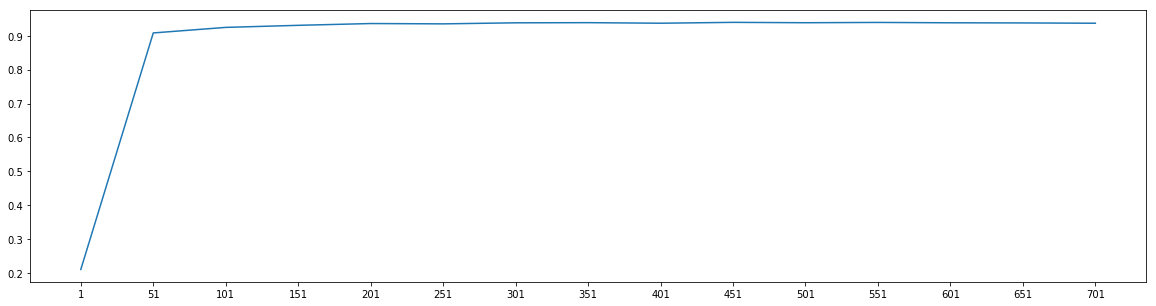

In [100]:
# 学习曲线
score = []
for i in range(1,751,50):
    X_wrapper = RFE(RFC_,n_features_to_select=i, step=50).fit_transform(X,y)
    once = cross_val_score(RFC_,X_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()

## 特征选择总结
经验来说，过滤法更快速，但更粗糙。包装法和嵌入法更精确，比较适合具体到算法去调整，但计算量比较大，运行时间长。当数据量很大的时候，优先使用方差过滤和互信息法调整，再上其他特征选择方法。使用逻辑回归时，优先使用嵌入法。使用支持向量机时，优先使用包装法。迷茫的时候，从过滤法走起，看具体数据具体分析。